# 지도학습 분류 맛보기

In [1]:
# !pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 이진분류 - 도미(bream) or 빙어(smelt)

- 이진분류는 0, 1로 구분
    - A냐? B냐? (X)
    - A냐? A가 아니냐? (O)
- 도미야? (1) / 도미가 아니야? (0)

##### 1. 데이터 로드 및 정제

In [4]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)

(35, 35)

In [5]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)

(14, 14)

##### 2. 데이터 확인 (EDA)

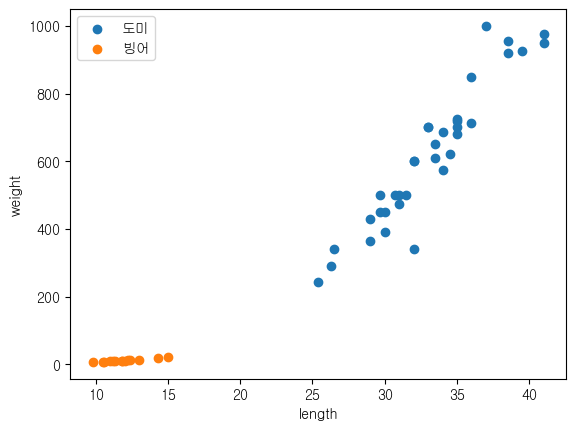

In [6]:
# 산점도를 통한 데이터 분포 확인 (관계, ...)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

##### 3. 데이터 전처리

- 모델이 원하는(사용하는) 형태로 데이터 가공
    - 입력(특성): 2차원 배열 -> [길이, 무게]
    - 결과(정답): 1차원 배열 -> 도미(1) or 빙어(0)으로 구성

In [7]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
len(fish_length), len(fish_weight)

# 입력(X) 데이터
train_input = []
for l, w in zip(fish_length, fish_weight):
    train_input.append((l, w))
# train_input

# 정답(y) 데이터
train_label = [1] * len(bream_length) + [0] * len(smelt_length)
# train_label

##### 💡 k-최근접 이웃 [분류] 모델 (KNN, K-Nearest Neighbors model)
- 주어진 데이터와 가장 가까운 k개의 이웃을 잡고, 이웃 데이터를 이용해 결과 예측

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kn = KNeighborsClassifier()

# fit() - score() - predict()
# 훈련/학습 - 평가 - 예측

kn.fit(train_input, train_label)    # [KNN 모델의 학습] 별도의 연산 없이 모델이 데이터를 로드하면 끝
kn.score(train_input, train_label)  # 1.0 (== 100%)
kn.predict([[30, 500], [10, 5]])    # 예측 결과 array([1, 0])

array([1, 0])

In [10]:
# kneighbors()
# - distances: 입력 데이터와 모델 데이터포인트와의 거리 (유클리드 거리 측정 방식)
# - indexs: 가장 가까운 k개의 모델 데이터포인트의 인덱스
distances, indexs = kn.kneighbors([[30, 500]])

print(distances)
print(indexs)

[[ 0.3         0.7         1.          1.5        25.01999201]]
[[ 6  9 11 12 10]]


[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]


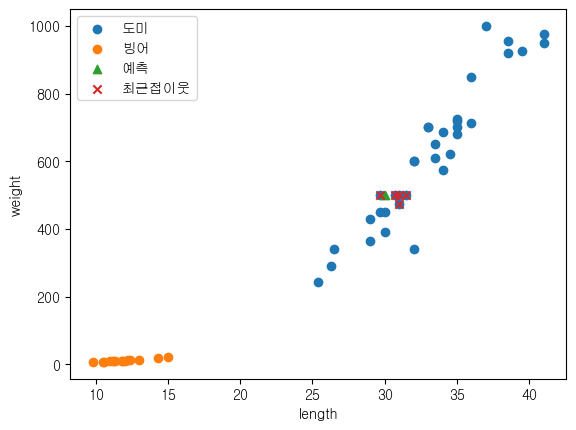

In [11]:
# 시각화 (최근접 이웃 확인)
train_input = np.array(train_input)
print(train_input[indexs])

plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(30, 500, label='예측', marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], label='최근접이웃', marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [12]:
# n_neighbors: k 설정 (기본값 = 5)
# - knn 모델은 적절한 k 값 설정이 중요함
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label)

0.7142857142857143

In [13]:
# 도미 개수 / 전체 개수
len(bream_length)/len(fish_length)

0.7142857142857143

##### 4. 데이터 분리 (훈련데이터/평가데이터)

In [14]:
# sampling 편향: 데이터가 한쪽으로 치우친 현상
# - train 데이터는 전부 다 도미, test 데이터는 전부 다 빙어
fish_input = []
for l, w in zip(fish_length, fish_weight):
    fish_input.append((l, w))

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)

# 학습용 데이터셋
train_input = fish_input[:35]
train_label = fish_label[:35]   # 1

# 평가용 데이터셋
test_input = fish_input[35:]
test_label = fish_label[35:]    # 0

In [15]:
# sampling 편향이 있으면 모델이 제대로 학습될 수 없음
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.0

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = \
    train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)
# - train_size or test_size: 둘 중 하나를 지정해 train-test dataset의 나누는 비율 지정 (0~1)
# - stratify: 라벨 데이터의 비율에 맞게 데이터셋을 나누도록 설정
# - random_state: 난수 seed 고정

# train_input, test_input, train_label, test_label
len(train_label), len(test_label), sum(train_label), sum(test_label)

(34, 15, 24, 11)

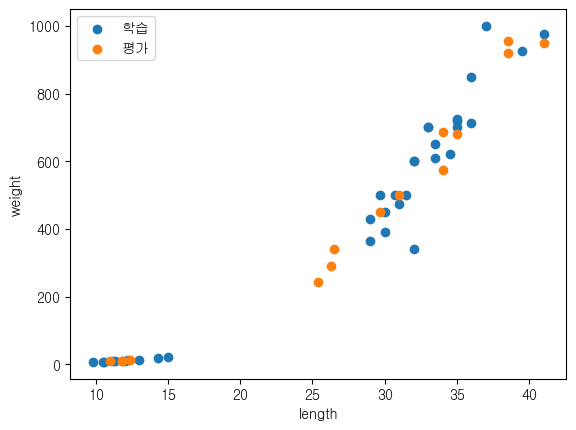

In [17]:
train_input = np.array(train_input)
test_input = np.array(test_input)

plt.scatter(train_input[:, 0], train_input[:, 1], label='학습')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [18]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

##### 5. 데이터 정규화

- 데이터포인트의 값의 범위를 재정의하는 것
    - Z-변환 (z-score) => StandardScaler
    - 0-1변환 => MinMaxScaler

In [19]:
# 데이터 스케일 차이로 인한 문제
kn.predict([[25, 150]])

array([0])

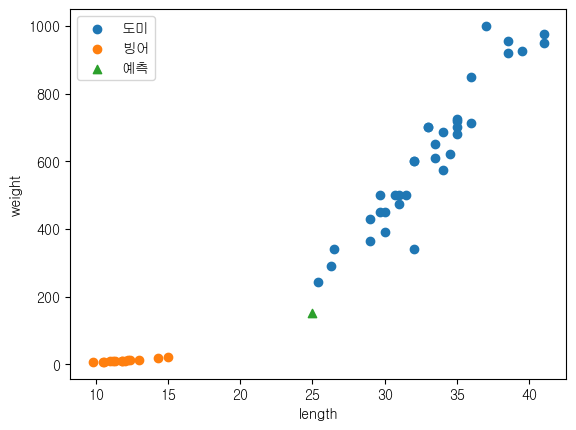

In [20]:
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(25, 150, label='예측', marker='^')
plt.xlabel('length')
plt.ylabel('weight')
# plt.xlim((0, 1000))
plt.legend()
plt.show()

- z-score(표준점수): 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    z-score = \frac{데이터포인트 - 평균}{표준편차}
$$

In [21]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [22]:
# 훈련데이터 정규화
train_scaled = (train_input - mean) / std
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [23]:
# 동일한 방식으로 평가데이터 정규화
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

In [24]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [25]:
# 예측 시에도 동일한 방식으로 데이터를 정규화 해야 함
predict_input = np.array([[25, 150]])
predict_scaled = (predict_input - mean) / std
kn.predict(predict_scaled)

array([1])

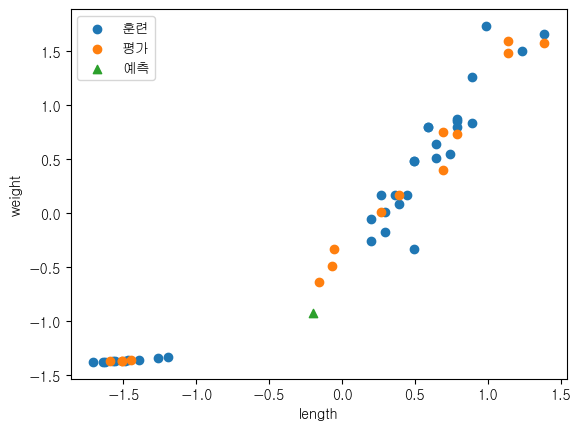

In [26]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가')
plt.scatter(predict_scaled[0, 0], predict_scaled[0, 1], label='예측', marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

- scikit-learn의 StandardScaler 활용

In [27]:
from sklearn.preprocessing import StandardScaler

# fit() - transform()
# 계산 - 변환
std_scaler = StandardScaler()
train_scaled_by_sc = std_scaler.fit_transform(train_input)

for i in range(len(train_input)):
    print(train_scaled[i] == train_scaled_by_sc[i])

[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]


### 다중분류 - 어떤 생선이냐?

##### 1. 데이터 로드 및 정제 ~ 2. 데이터 확인 (EDA)

In [28]:
df = pd.read_csv('./data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [30]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [31]:
df['Species'].unique(), df['Species'].value_counts()

(array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object),
 Species
 Perch        56
 Bream        35
 Roach        20
 Pike         17
 Smelt        14
 Parkki       11
 Whitefish     6
 Name: count, dtype: int64)

In [32]:
# 이상치가 있는 행 제거
df[df['Weight'] == 0].index         # Weight가 0인 생선 = index 40번
df = df.drop(40).reset_index(drop=True)
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


##### 3. 데이터 전처리 ~ 4. 데이터 분리 (학습데이터/평가데이터)

- (1) 학습 데이터의 규격: dataframe 하나 -> input data + label data (numpy ndarray)
- (2) 훈련 데이터/평가 데이터의 분리
- (3) 정규화 (컬럼값 사이의 차이를 완화)

In [33]:
fish_input = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [34]:
train_input, test_input, train_label, test_label = \
    train_test_split(fish_input, fish_label, test_size=.10, random_state=0, stratify=fish_label)

train_input.shape, test_input.shape

((142, 5), (16, 5))

In [35]:
std_scaler = StandardScaler()
# std_scaler.fit(train_input)
# train_scaled = std_scaler.transform(train_input)
train_scaled = std_scaler.fit_transform(train_input)    # 학습 데이터 -> 평균/표준편차 계산 + 정규화 반영
test_scaled = std_scaler.transform(test_input)          # 테스트 데이터 <- 정규화 반영

##### 5. 모델 선정 및 학습
- KNeighborsClassifier (KNN 분류 모델)

In [36]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_label)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [37]:
# train_scaled

In [38]:
# kn 모델을 학습시키는 데에 사용한 feature data
kn._fit_X

array([[ 3.93876975e-01,  5.36205230e-01,  4.24973853e-01,
         2.76075619e-01,  1.12422646e+00],
       [ 1.61010941e+00,  1.03641579e+00,  1.01289871e+00,
         7.59732376e-01,  1.20427861e+00],
       [ 1.40466474e+00,  9.90942107e-01,  1.16407939e+00,
         2.23553689e+00,  1.33509836e+00],
       [ 1.71996733e-01,  2.17889416e-01,  3.99777073e-01,
         1.19987732e+00,  3.77092537e-01],
       [ 2.29492497e+00,  2.49157380e+00,  2.37352481e+00,
         3.75182019e-01,  1.47203119e+00],
       [-9.15490378e-01, -9.00763301e-01, -1.01124258e+00,
        -8.90073281e-01, -7.76124076e-01],
       [-5.81300384e-01, -5.09689587e-01, -4.73711286e-01,
         2.96667060e-01, -4.61621040e-01],
       [-1.10203414e+00, -1.52830019e+00, -1.54037495e+00,
        -1.57844540e+00, -1.91577549e+00],
       [ 1.11704221e+00,  9.45468419e-01,  8.28122326e-01,
         7.77556770e-01,  1.68540654e+00],
       [-7.73048741e-01, -6.00636962e-01, -6.66886596e-01,
        -6.80054413e-01

In [39]:
# 분류 클래스
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

##### 6. 평가

In [40]:
kn.score(test_scaled, test_label)

0.6875

##### [참고] 다중분류 작동 방식

In [41]:
kn.predict(test_scaled[5:10])

array(['Perch', 'Smelt', 'Perch', 'Perch', 'Bream'], dtype=object)

In [42]:
test_label[5:10]

array(['Roach', 'Smelt', 'Perch', 'Perch', 'Bream'], dtype=object)

In [44]:
print(kn.classes_)
kn.predict_proba(test_scaled[5:10])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [45]:
distance, index = kn.kneighbors(test_scaled[5:6])
distance, index

(array([[0.12170915, 0.12532423, 0.15143406, 0.17736116, 0.2019137 ]]),
 array([[66, 10, 42, 24, 21]]))

In [46]:
train_label[index]

array([['Perch', 'Roach', 'Perch', 'Perch', 'Roach']], dtype=object)